# Time Series: Data Analysis and Missing Values

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from datetime import datetime

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dingling.csv')

In [4]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
def convert_to_date(x):
	return datetime.strptime(x, '%Y %m %d %H')

In [7]:
aq_df = pd.read_csv('/content/drive/MyDrive/Dingling.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)

In [8]:
aq_df.head()

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [9]:

aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [10]:
aq_df['month']=pd.to_numeric(aq_df['month'])

In [11]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  int64         
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [12]:
print ("Rows     : " ,aq_df.shape[0])
print ("Columns  : " ,aq_df.shape[1])
print ("\nFeatures : \n" ,aq_df.columns.tolist())
print ("\nMissing values :  ", aq_df.isnull().any())
print ("\nUnique values :  \n",aq_df.nunique())

Rows     :  35064
Columns  :  19

Features : 
 ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing values :   year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

Unique values :  
 year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5         

In [13]:
aq_df.describe()

,No,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,6.522930,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,3.448752,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,1.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,4.000000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,7.000000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,10.000000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,12.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [14]:
aq_df_non_indexed=aq_df.copy()

## Time Indexing

In [15]:
aq_df = aq_df.set_index('year_month_day_hour')

In [16]:
aq_df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='year_month_day_hour', length=35064, freq=None)

In [17]:
aq_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [18]:
aq_df.loc['2013-03-01':'2013-03-05']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-05 19:00:00,116,2013,3,5,19,179.0,200.0,50.0,96.0,1600.0,82.0,7.7,1005.4,-7.6,0.0,NNE,0.2,Dingling
2013-03-05 20:00:00,117,2013,3,5,20,172.0,180.0,43.0,94.0,1899.0,82.0,6.3,1005.9,-7.3,0.0,NNE,0.7,Dingling
2013-03-05 21:00:00,118,2013,3,5,21,179.0,191.0,38.0,80.0,1700.0,82.0,5.6,1006.0,-7.3,0.0,NNE,0.2,Dingling


In [19]:
aq_df.loc['2013':'2015']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,24860,2015,12,31,19,85.0,95.0,12.0,73.0,1200.0,2.0,-0.6,1021.0,-9.5,0.0,NE,0.6,Dingling
2015-12-31 20:00:00,24861,2015,12,31,20,NaN,109.0,32.0,79.0,2900.0,2.0,-1.8,1021.2,-9.9,0.0,NW,1.1,Dingling
2015-12-31 21:00:00,24862,2015,12,31,21,80.0,100.0,35.0,81.0,3200.0,2.0,-1.6,1020.8,-9.7,0.0,NE,0.9,Dingling


In [20]:
pm_data = aq_df['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

## Plotting

In [21]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

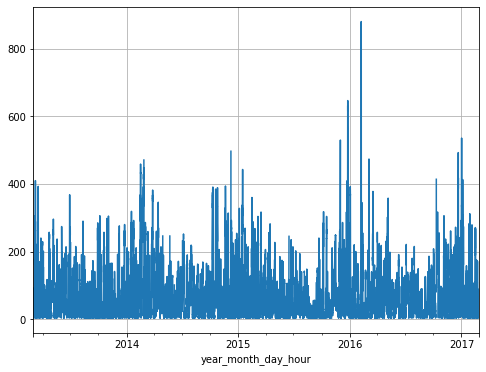

In [22]:
pm_data.plot(grid=True)

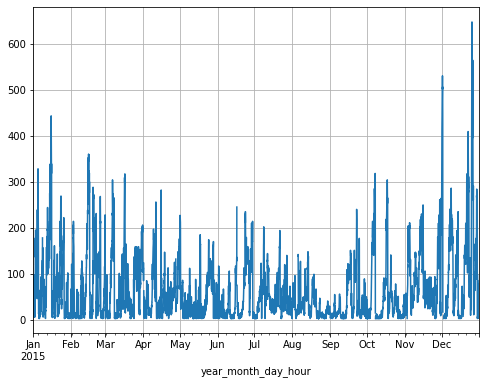

In [23]:
aq_df_2015=aq_df.loc['2015']
pm_data_2015=aq_df_2015['PM2.5']
pm_data_2015.plot(grid=True)

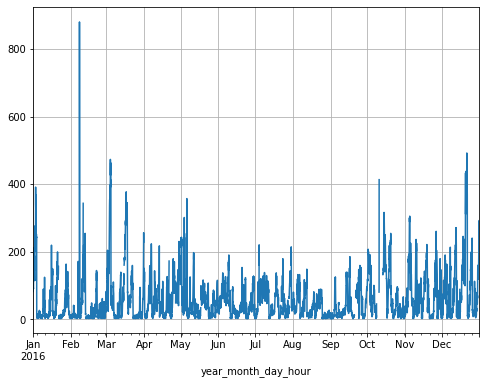

In [24]:
aq_df_2016=aq_df['2016']
pm_data_2016=aq_df_2016['PM2.5']
pm_data_2016.plot(grid=True)

In [25]:
import plotly.express as px
fig = px.line(aq_df_non_indexed, x='year_month_day_hour', y='PM2.5', title='PM2.5 with Slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [26]:
fig = px.line(aq_df_non_indexed, x='year_month_day_hour', y='PM2.5', title='PM2.5 with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb151f8d250>,
      dtype=object)

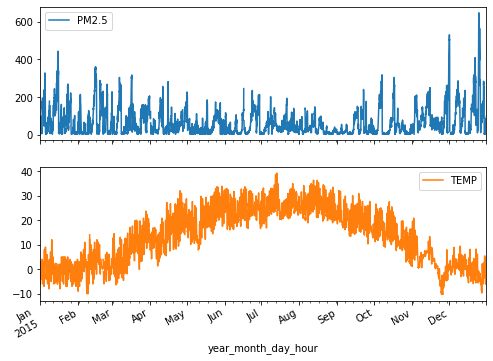

In [27]:
aq_df_2015=aq_df['2015']
pm_data_2015=aq_df_2015[['PM2.5','TEMP']]
pm_data_2015.plot(subplots=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb152700450>,
      dtype=object)

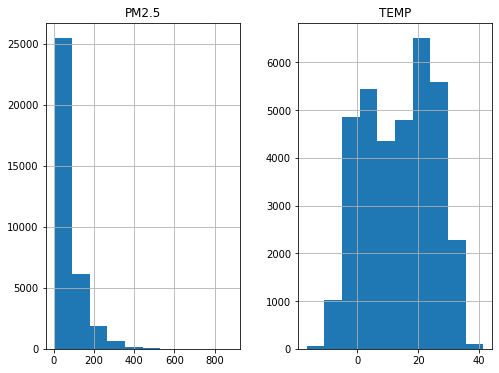

In [28]:
aq_df[['PM2.5','TEMP']].hist()

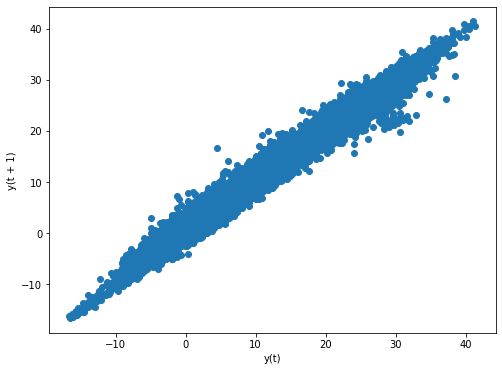

In [29]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=1)

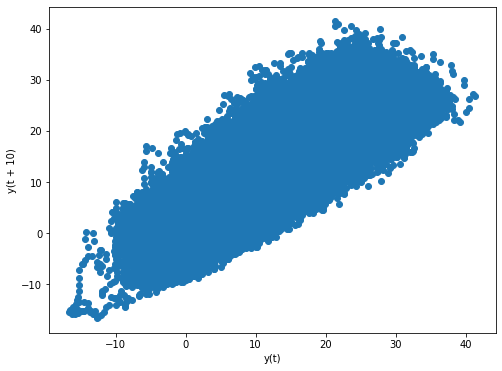

In [30]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=10)

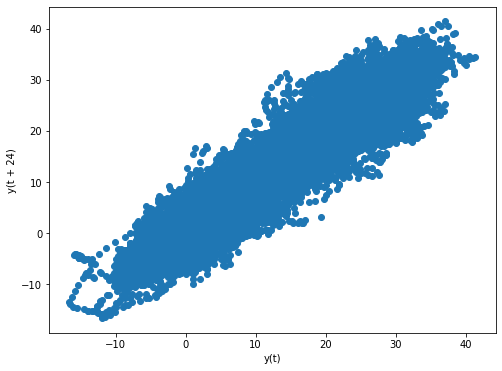

In [31]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=24)

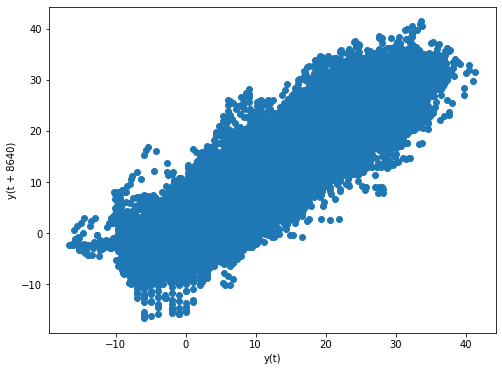

In [32]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=8640)

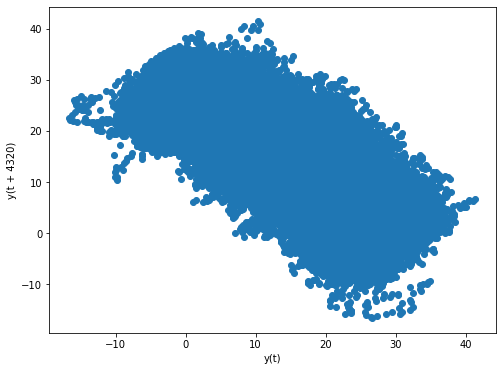

In [33]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=4320)

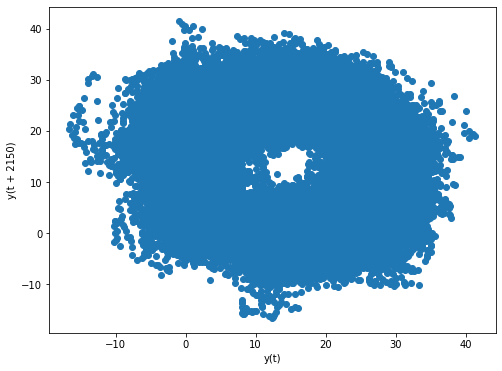

In [34]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=2150)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb14fdb1650>,
      dtype=object)

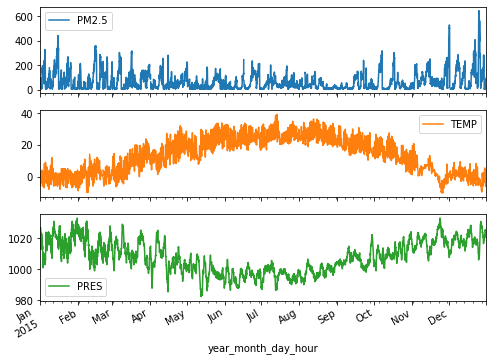

In [35]:
aq_df_2015=aq_df['2015']
pm_data_2015=aq_df_2015[['PM2.5','TEMP','PRES']]
pm_data_2015.plot(subplots=True)

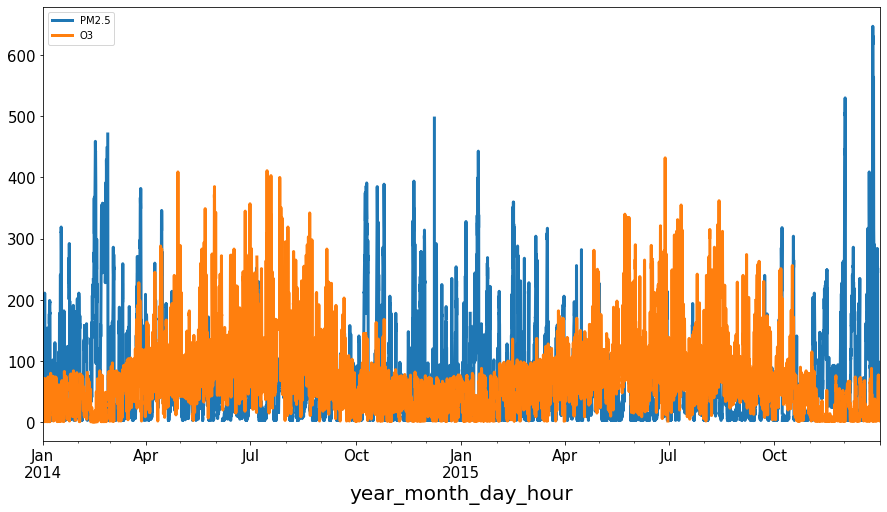

In [36]:
aq_df['2014':'2015'][['PM2.5','O3']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('year_month_day_hour', fontsize=20);

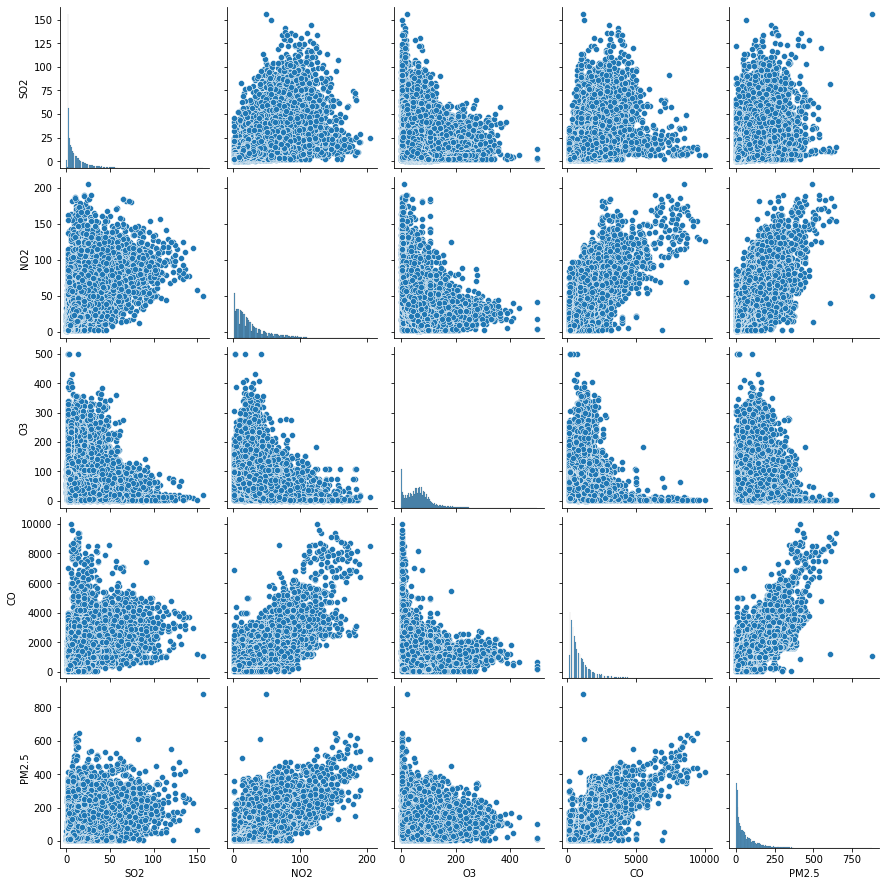

In [37]:
g = sns.pairplot(aq_df[['SO2','NO2','O3', 'CO','PM2.5']])

In [38]:
aq_corr=aq_df[['SO2','NO2','O3', 'CO','PM2.5']].corr(method='pearson')
aq_corr

,SO2,NO2,O3,CO,PM2.5
SO2,1.000000,0.610433,-0.182096,0.529182,0.475117
NO2,0.610433,1.000000,-0.373625,0.798753,0.718170
O3,-0.182096,-0.373625,1.000000,-0.303275,-0.100542
CO,0.529182,0.798753,-0.303275,1.000000,0.802737
PM2.5,0.475117,0.718170,-0.100542,0.802737,1.000000


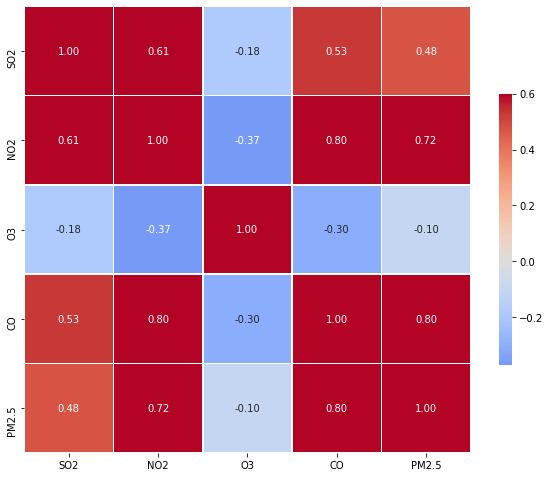

In [39]:
g = sns.heatmap(aq_corr,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
    
plt.show()

In [40]:
aq_df.groupby('wd').agg(median=('PM2.5','median'),mean=('PM2.5','mean'),max=('PM2.5','max'), min=('PM2.5','min')).reset_index()

,wd,median,mean,max,min
0,E,70.0,88.623363,434.0,3.0
1,ENE,56.5,77.685514,647.0,3.0
2,ESE,78.5,96.492276,632.0,3.0
3,N,29.0,57.546221,536.0,3.0
4,NE,32.0,57.390083,530.0,3.0
5,NNE,26.0,53.946239,881.0,3.0
6,NNW,33.0,62.790775,548.0,3.0
7,NW,21.0,52.769116,535.0,3.0
8,S,52.0,72.497281,511.0,3.0
9,SE,70.0,85.045709,617.0,3.0


### Autocorrelation Plot

In [41]:
aq_df_na = aq_df.copy()
aq_df_na=aq_df_na.dropna()

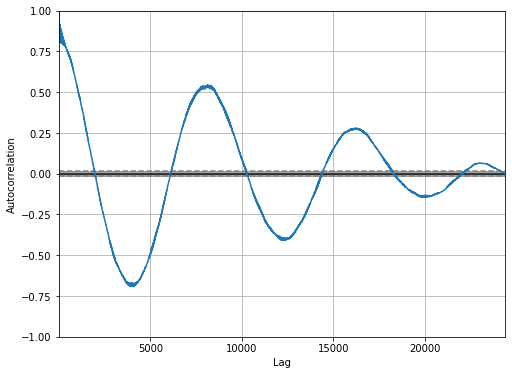

In [42]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'])

In [43]:
aq_df_na['TEMP'].resample("1m").mean()

year_month_day_hour
2013-03-31     6.039970
2013-04-30    12.208494
2013-05-31    21.886386
2013-06-30    23.752827
2013-07-31    27.405079
2013-08-31    27.228465
2013-09-30    20.482500
2013-10-31          NaN
2013-11-30     5.434524
2013-12-31     0.896623
2014-01-31     0.023428
2014-02-28    -0.352762
2014-03-31    10.415449
2014-04-30    17.235362
2014-05-31    22.043236
2014-06-30    25.194985
2014-07-31    28.409502
2014-08-31    26.284552
2014-09-30    20.834161
2014-10-31    13.556000
2014-11-30     6.357762
2014-12-31    -0.745582
2015-01-31    -0.590377
2015-02-28     1.572512
2015-03-31     8.707613
2015-04-30    15.566570
2015-05-31    21.300275
2015-06-30    24.636691
2015-07-31    26.228630
2015-08-31    26.135854
2015-09-30    20.392206
2015-10-31    14.387465
2015-11-30     3.358686
2015-12-31    -0.053912
2016-01-31    -4.233428
2016-02-29     1.434441
2016-03-31     8.687006
2016-04-30    16.262014
2016-05-31    20.793142
2016-06-30    25.481977
2016-07-31    25.839

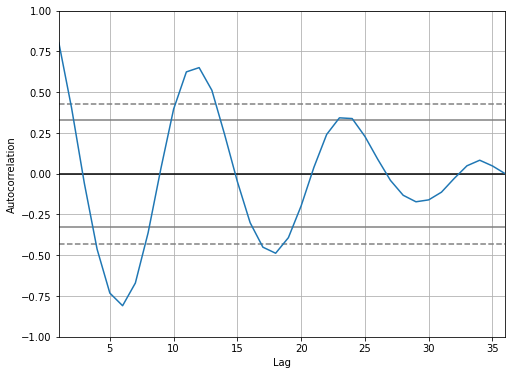

In [44]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['TEMP'].resample("1m").mean())

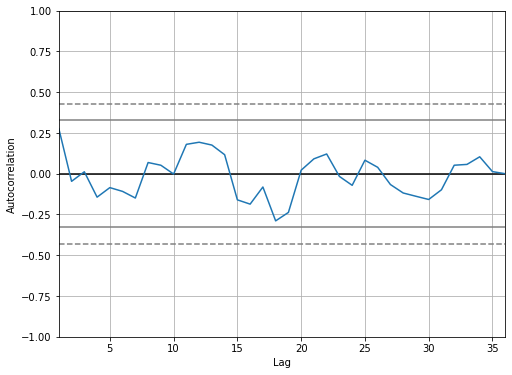

In [45]:
pd.plotting.autocorrelation_plot(aq_df_na['2014':'2016']['PM2.5'].resample("1m").mean())

## Missing Values

In [46]:
aq_df['2015-02-21 10':'2015-02-21 20']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2015-02-21 10:00:00,17339,2015,2,21,10,171.0,171.0,16.0,48.0,2400.0,6.0,1.0,1005.0,-1.1,0.0,SW,1.1,Dingling
2015-02-21 11:00:00,17340,2015,2,21,11,172.0,172.0,16.0,45.0,2200.0,13.0,1.0,1006.0,-0.9,0.0,SSW,1.2,Dingling
2015-02-21 12:00:00,17341,2015,2,21,12,164.0,164.0,16.0,46.0,2100.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-21 13:00:00,17342,2015,2,21,13,175.0,175.0,16.0,46.0,2200.0,15.0,2.0,1006.0,-0.3,0.0,SW,1.6,Dingling
2015-02-21 14:00:00,17343,2015,2,21,14,207.0,207.0,16.0,46.0,2300.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,Dingling
2015-02-21 15:00:00,17344,2015,2,21,15,231.0,231.0,18.0,40.0,2200.0,32.0,4.0,1004.0,-8.7,0.0,W,9.6,Dingling
2015-02-21 16:00:00,17345,2015,2,21,16,3.0,114.0,7.0,5.0,1100.0,88.0,4.0,1005.0,-12.5,0.0,NW,9.0,Dingling
2015-02-21 17:00:00,17346,2015,2,21,17,24.0,227.0,2.0,3.0,1800.0,91.0,3.0,1009.0,-16.7,0.0,WNW,6.4,Dingling
2015-02-21 18:00:00,17347,2015,2,21,18,40.0,351.0,2.0,2.0,1800.0,97.0,2.0,1010.0,-21.3,0.0,NW,7.3,Dingling


In [47]:
aq_df_imp=aq_df['2015-02-21 10':'2015-02-21 23'][['TEMP']]

In [48]:
aq_df_imp

,TEMP
year_month_day_hour,
2015-02-21 10:00:00,1.0
2015-02-21 11:00:00,1.0
2015-02-21 12:00:00,NaN
2015-02-21 13:00:00,2.0
2015-02-21 14:00:00,NaN
2015-02-21 15:00:00,4.0
2015-02-21 16:00:00,4.0
2015-02-21 17:00:00,3.0
2015-02-21 18:00:00,2.0


In [49]:
aq_df_imp['TEMP_FFILL']=aq_df_imp['TEMP'].fillna(method='ffill')

In [50]:
aq_df_imp

,TEMP,TEMP_FFILL
year_month_day_hour,,
2015-02-21 10:00:00,1.0,1.0
2015-02-21 11:00:00,1.0,1.0
2015-02-21 12:00:00,NaN,1.0
2015-02-21 13:00:00,2.0,2.0
2015-02-21 14:00:00,NaN,2.0
2015-02-21 15:00:00,4.0,4.0
2015-02-21 16:00:00,4.0,4.0
2015-02-21 17:00:00,3.0,3.0
2015-02-21 18:00:00,2.0,2.0


In [51]:
aq_df_imp['TEMP_BFILL']=aq_df_imp['TEMP'].fillna(method='bfill')

In [52]:
aq_df_imp

,TEMP,TEMP_FFILL,TEMP_BFILL
year_month_day_hour,,,
2015-02-21 10:00:00,1.0,1.0,1.0
2015-02-21 11:00:00,1.0,1.0,1.0
2015-02-21 12:00:00,NaN,1.0,2.0
2015-02-21 13:00:00,2.0,2.0,2.0
2015-02-21 14:00:00,NaN,2.0,4.0
2015-02-21 15:00:00,4.0,4.0,4.0
2015-02-21 16:00:00,4.0,4.0,4.0
2015-02-21 17:00:00,3.0,3.0,3.0
2015-02-21 18:00:00,2.0,2.0,2.0


In [53]:
aq_df_imp['TEMP'].rolling(window=2, min_periods=1).mean()

year_month_day_hour
2015-02-21 10:00:00    1.0
2015-02-21 11:00:00    1.0
2015-02-21 12:00:00    1.0
2015-02-21 13:00:00    2.0
2015-02-21 14:00:00    2.0
2015-02-21 15:00:00    4.0
2015-02-21 16:00:00    4.0
2015-02-21 17:00:00    3.5
2015-02-21 18:00:00    2.5
2015-02-21 19:00:00    1.5
2015-02-21 20:00:00    1.0
2015-02-21 21:00:00   -1.0
2015-02-21 22:00:00   -1.0
2015-02-21 23:00:00   -1.5
Name: TEMP, dtype: float64

In [54]:
aq_df_imp['TEMP_ROLLING']=aq_df_imp['TEMP'].rolling(window=2, min_periods=1).mean()

In [55]:
aq_df_imp

,TEMP,TEMP_FFILL,TEMP_BFILL,TEMP_ROLLING
year_month_day_hour,,,,
2015-02-21 10:00:00,1.0,1.0,1.0,1.0
2015-02-21 11:00:00,1.0,1.0,1.0,1.0
2015-02-21 12:00:00,NaN,1.0,2.0,1.0
2015-02-21 13:00:00,2.0,2.0,2.0,2.0
2015-02-21 14:00:00,NaN,2.0,4.0,2.0
2015-02-21 15:00:00,4.0,4.0,4.0,4.0
2015-02-21 16:00:00,4.0,4.0,4.0,4.0
2015-02-21 17:00:00,3.0,3.0,3.0,3.5
2015-02-21 18:00:00,2.0,2.0,2.0,2.5


In [56]:
aq_df.loc[aq_df_imp.index + pd.offsets.DateOffset(years=-1)]['TEMP']

year_month_day_hour
2014-02-21 10:00:00    1.4
2014-02-21 11:00:00    2.4
2014-02-21 12:00:00    3.0
2014-02-21 13:00:00    3.8
2014-02-21 14:00:00    3.5
2014-02-21 15:00:00    3.6
2014-02-21 16:00:00    3.3
2014-02-21 17:00:00    2.8
2014-02-21 18:00:00    1.3
2014-02-21 19:00:00    0.7
2014-02-21 20:00:00    1.2
2014-02-21 21:00:00    1.1
2014-02-21 22:00:00    0.7
2014-02-21 23:00:00    0.6
Name: TEMP, dtype: float64

In [57]:
aq_df_imp=aq_df_imp.reset_index()

In [58]:
aq_df_imp

,year_month_day_hour,TEMP,TEMP_FFILL,TEMP_BFILL,TEMP_ROLLING
0,2015-02-21 10:00:00,1.0,1.0,1.0,1.0
1,2015-02-21 11:00:00,1.0,1.0,1.0,1.0
2,2015-02-21 12:00:00,NaN,1.0,2.0,1.0
3,2015-02-21 13:00:00,2.0,2.0,2.0,2.0
4,2015-02-21 14:00:00,NaN,2.0,4.0,2.0
5,2015-02-21 15:00:00,4.0,4.0,4.0,4.0
6,2015-02-21 16:00:00,4.0,4.0,4.0,4.0
7,2015-02-21 17:00:00,3.0,3.0,3.0,3.5
8,2015-02-21 18:00:00,2.0,2.0,2.0,2.5
9,2015-02-21 19:00:00,1.0,1.0,1.0,1.5


In [59]:
aq_df_imp['TEMP_PREVY']=aq_df_imp.apply(lambda x: aq_df.loc[x['year_month_day_hour'] - pd.offsets.DateOffset(years=-1)]['TEMP'] if pd.isna(x['TEMP']) else x['TEMP'], axis=1)

In [60]:
aq_df_imp

,year_month_day_hour,TEMP,TEMP_FFILL,TEMP_BFILL,TEMP_ROLLING,TEMP_PREVY
0,2015-02-21 10:00:00,1.0,1.0,1.0,1.0,1.0
1,2015-02-21 11:00:00,1.0,1.0,1.0,1.0,1.0
2,2015-02-21 12:00:00,NaN,1.0,2.0,1.0,1.9
3,2015-02-21 13:00:00,2.0,2.0,2.0,2.0,2.0
4,2015-02-21 14:00:00,NaN,2.0,4.0,2.0,4.9
5,2015-02-21 15:00:00,4.0,4.0,4.0,4.0,4.0
6,2015-02-21 16:00:00,4.0,4.0,4.0,4.0,4.0
7,2015-02-21 17:00:00,3.0,3.0,3.0,3.5,3.0
8,2015-02-21 18:00:00,2.0,2.0,2.0,2.5,2.0
9,2015-02-21 19:00:00,1.0,1.0,1.0,1.5,1.0
